In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## 0. Install IPD package 
Note: Also installs notebook packages for running demos. Omit the optional `notebooks` group if you don't want this.
### Option 1 (from source):
1. Clone this github repo
2. Run `pip install -e .[notebooks]` 
    1. Make sure you are using a compatible python version (tested with 3.9.2 and 3.10.14)
    2. Recommend using a venv

### Option 2 (not available yet):
1. `pip install intrinsic-ipd[notebooks]`

### Option 3:
1. `pip install git+[github/http/url]@main[notebooks]`

## 1. Imports

In [2]:
from intrinsic_ipd import IPDReader, IPDCamera, IPDImage, IPDLightCondition
import intrinsic_ipd.constants # import CameraFramework, DATASET_IDS
import os
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
np.set_printoptions(precision=4, suppress=True)

In [3]:
import logging
logging.basicConfig(
    level=logging.INFO,  # Set the logging level (INFO, DEBUG, WARNING, etc.)
    format="%(asctime)s - %(name)s - %(levelname)s - %(filename)s - %(funcName)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

## 2. Download (if not exists) and load dataset

In [4]:
camera = intrinsic_ipd.constants.IPDCamera.PHOTONEO
lighting = intrinsic_ipd.constants.IPDLightCondition.ROOM 
dataset = 'dataset_basket_0'

In [5]:
ipd_reader = IPDReader("./datasets", dataset, camera, lighting=lighting, download=True) 

2024-09-21 00:20:50 - root - INFO - reader.py - __init__ - 
	Dataset:	dataset_basket_0
	Dataset Path:	./datasets/dataset_basket_0/test
	Camera Type:	Photoneo (ID: 000)
	Lighting:	ROOM
	Num Scenes:	30


In [6]:
ipd_reader.parts

{'gear1', 'pegboard_basket', 'u_bolt'}

In [7]:
ipd_reader.objects

[('gear1', 0),
 ('gear1', 1),
 ('gear1', 2),
 ('gear1', 3),
 ('pegboard_basket', 0),
 ('u_bolt', 0),
 ('u_bolt', 1),
 ('u_bolt', 2)]

## 3. Render 

`from intrinsic_ipd.render import render_scene`

Note that the rendering code uses `pyrender` for offscreen rendering. Please specify a compatible backend. See pyrender's official documentation [here](https://pyrender.readthedocs.io/en/latest/examples/offscreen.html).

2024-09-21 00:20:50 - OpenGL.acceleratesupport - INFO - acceleratesupport.py - <module> - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
2024-09-21 00:20:51 - root - WARNING - render.py - render_scene - Set PYOPENGL_PLATFORM environment variable before importing pyrender or any other OpenGL library. 
	Setting to PYOPENGL_PLATFORM=`egl`. 
	See https://pyrender.readthedocs.io/en/latest/examples/offscreen.html 
2024-09-21 00:20:51 - root - INFO - reader.py - get_img - Opening image from ./datasets/dataset_basket_0/test/000030/000/rgb/000000.png
[ WARN:0@1.815] global matrix_expressions.cpp:1333 assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739


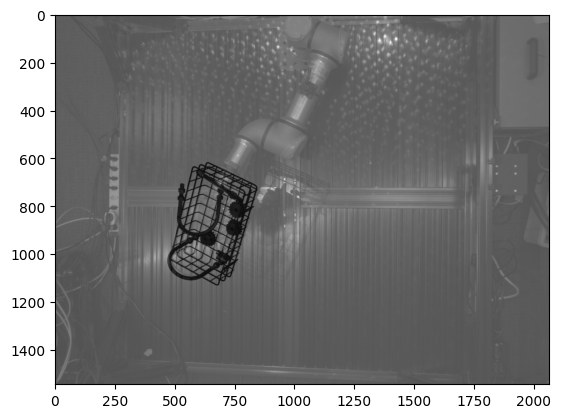

In [8]:
%matplotlib inline
from intrinsic_ipd.render import render_scene
image, rendered_image, overlay = render_scene(ipd_reader, 30)
plt.imshow(overlay)


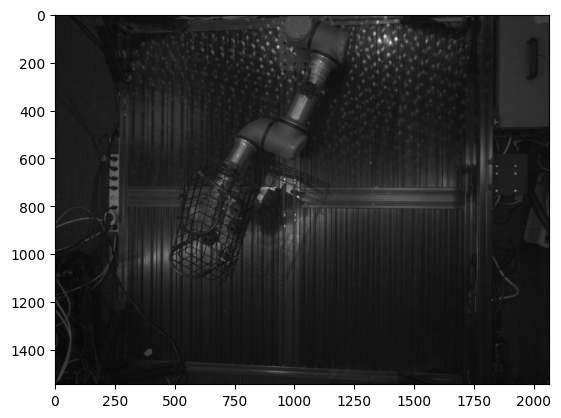

In [9]:
plt.imshow(image)

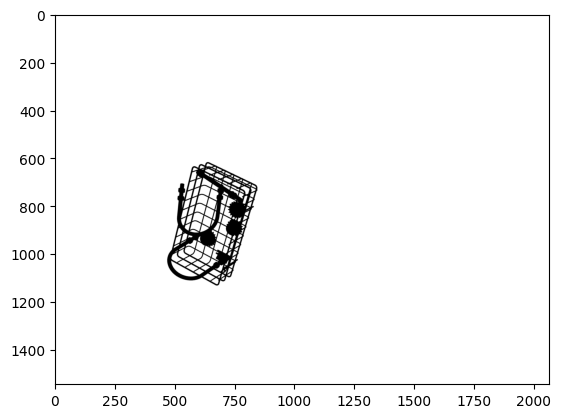

In [10]:
plt.imshow(rendered_image)

In [11]:
## TO SAVE THE IMAGE

# %matplotlib agg

# fig = plt.figure(figsize=(10, 5))
# plt.axis('off')
# plt.imshow(overlay)
# plt.savefig(f'image_{ipd_reader.dataset_id}_{ipd_reader.camera.type}.png', bbox_inches='tight')
# print(f"Image saved to './image_{ipd_reader.dataset_id}_{ipd_reader.camera.type}.png'")

## 4. Render masks of objects

Masks should be rendered already and retrievable with `ipd_reader.get_mask`, but in case you wanted to...

In [18]:
masks = ipd_reader.render_masks(scene=30) #NOTE: NOT SAVED TO DISK!
mask = masks[ipd_reader.objects[0]]

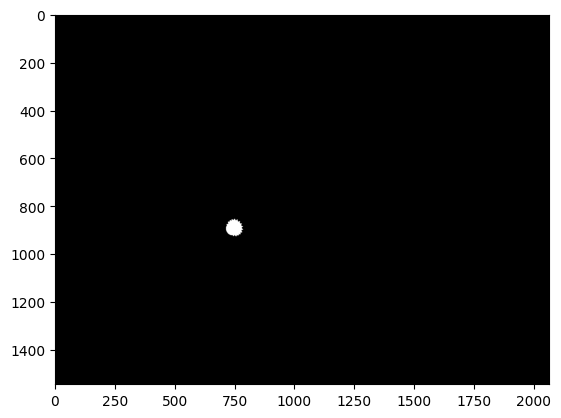

In [19]:
plt.imshow(mask)